In [14]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('../DATA/correlation.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
y = data.diagnosis
X = data.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)

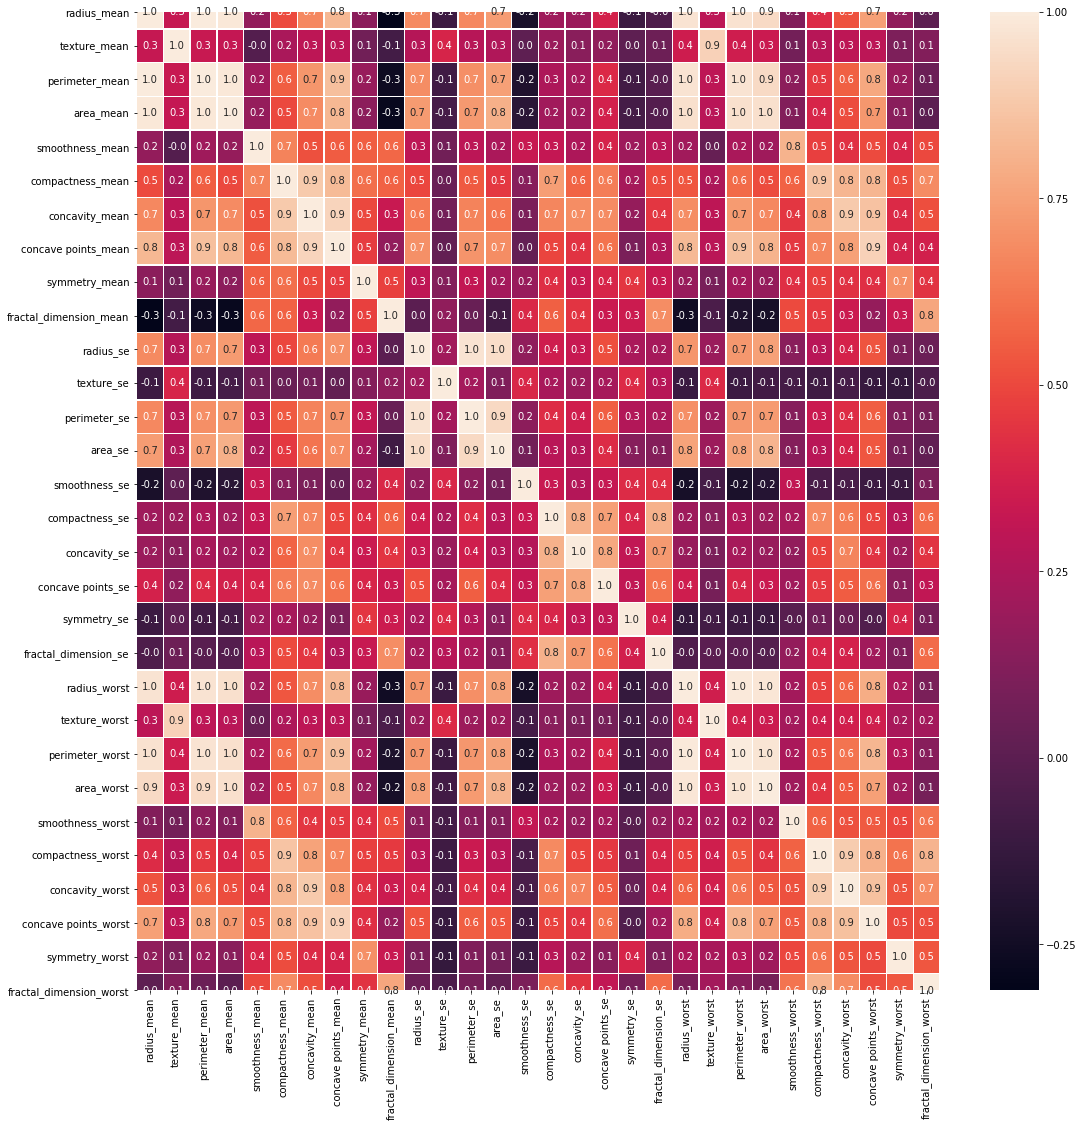

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

feature1: mean=14.127 stdv=3.521
feature2: mean=654.889 stdv=351.605
covariance [[1.24189201e+01 1.22448341e+03]
 [1.22448341e+03 1.23843554e+05]]
pearsons correlation: 0.987


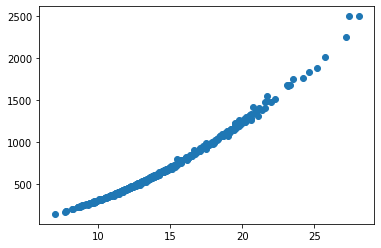

In [16]:
feature1, feature2 = data.radius_mean, data.area_mean
print('feature1: mean=%.3f stdv=%.3f' % (np.mean(feature1), np.std(feature1)))
print('feature2: mean=%.3f stdv=%.3f' % (np.mean(feature2), np.std(feature2)))
print('covariance', np.cov(feature1, feature2))
corr, _ = pearsonr(feature1, feature2)
print('pearsons correlation: %.3f' % corr)

plt.scatter(feature1, feature2)
plt.show()

feature1: mean=14.127 stdv=3.521
feature2: mean=0.063 stdv=0.007
covariance [[ 1.24189201e+01 -7.75370629e-03]
 [-7.75370629e-03  4.98487228e-05]]
pearsons correlation: -0.312


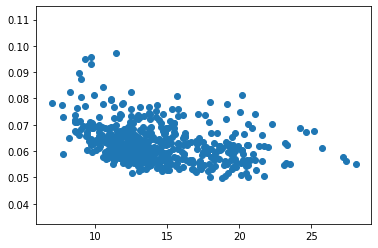

In [15]:
feature1, feature2 = data.radius_mean, data.fractal_dimension_mean
print('feature1: mean=%.3f stdv=%.3f' % (np.mean(feature1), np.std(feature1)))
print('feature2: mean=%.3f stdv=%.3f' % (np.mean(feature2), np.std(feature2)))
print('covariance', np.cov(feature1, feature2))

corr, _ = pearsonr(feature1, feature2)
print('pearsons correlation: %.3f' % corr)

plt.scatter(feature1, feature2)
plt.show()